# **HeartBeat Harmony**

Cardiovascular disease (CVD), the silent predator lurking within our global community, casts a formidable shadow over our collective health landscape. With its insidious reach extending across continents, CVD stands as the leading cause of mortality worldwide, claiming an astonishing 17.9 million lives annually according to the World Health Organization.

To put this staggering figure into perspective, that's approximately 1 in every 3 deaths globally attributed to cardiovascular diseases. This intricate web of heart and vascular maladies—spanning from coronary artery disease and heart failure to strokes and arrhythmias—challenges the very rhythm of our existence.

Amidst this global backdrop, datasets like the Cleveland heart dataset (heart-attack-analysis-prediction-dataset) serve as invaluable tools in unraveling the complexities of cardiovascular health. By analyzing comprehensive data on factors such as age, sex, cholesterol levels, and exercise-induced angina, researchers and healthcare professionals can gain deeper insights into the predictors and patterns of heart attacks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


This is like skimming through the first few lines of the table to see what kind of data it holds. It shows us the first five rows, which usually gives us a good idea about the columns and some sample data points. It's a bit like flipping through the pages of a book to get a sense of its contents before diving deeper into the details.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


This summary helps you quickly understand the size of your dataset, the types of data it contains, and whether there are any missing values that need to be addressed before further analysis or modeling. It's like getting a quick health check-up for your dataset, providing essential information to ensure it's ready for analysis or machine learning tasks.

In [4]:
df[df.duplicated()]
df.drop_duplicates(keep = 'first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


This code is used to clean the DataFrame by identifying and removing duplicate rows, ensuring that each row in the dataset is unique. After cleaning, the df.info() function is called to provide an overview of the cleaned dataset, confirming that duplicates have been successfully removed and giving insights into the dataset's structure and integrity.

In [5]:
nan_values = df.isna().sum()
print(nan_values)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


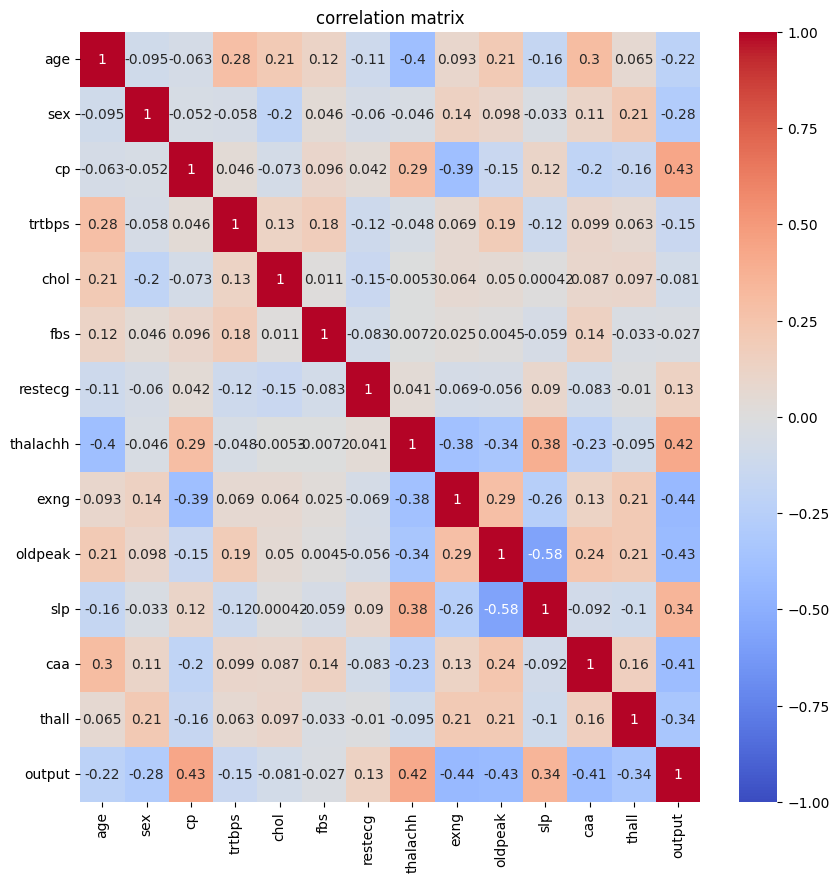

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("correlation matrix")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x1000 with 0 Axes>

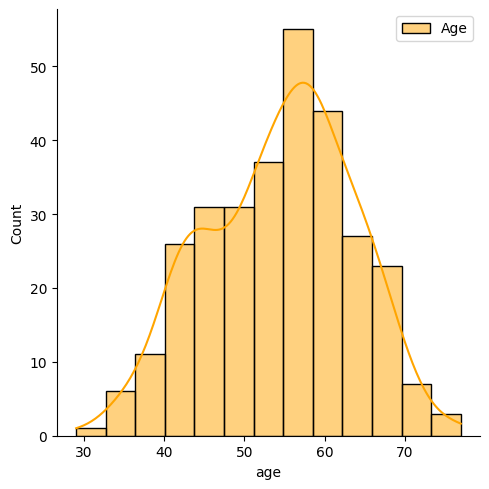

In [9]:
plt.figure(figsize=(12,10))
sns.displot(df.age, color='orange', label='Age', kde=True)
plt.legend()

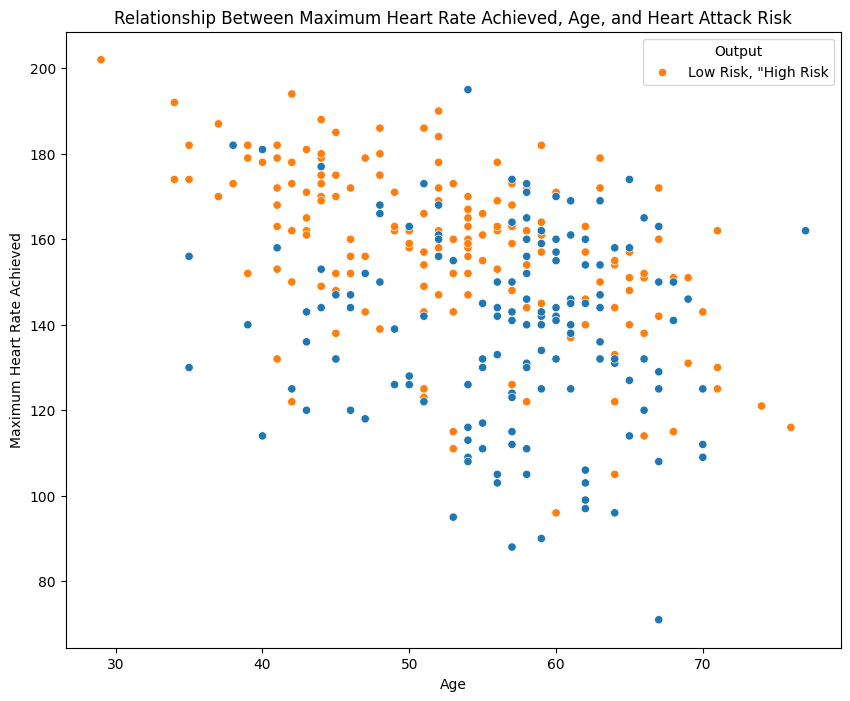

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='thalachh', hue='output', data=df)
plt.title("Relationship Between Maximum Heart Rate Achieved, Age, and Heart Attack Risk")
plt.xlabel("Age")
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend(title='Output', labels=['Low Risk, "High Risk'])
plt.show()

The relationship between age, maximum heart rate achieved, and heart attack risk indicates that younger individuals tend to have higher maximum heart rates. However, as age increases, there's a trend suggesting that the risk of heart attack rises, particularly among those with lower maximum heart rates. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

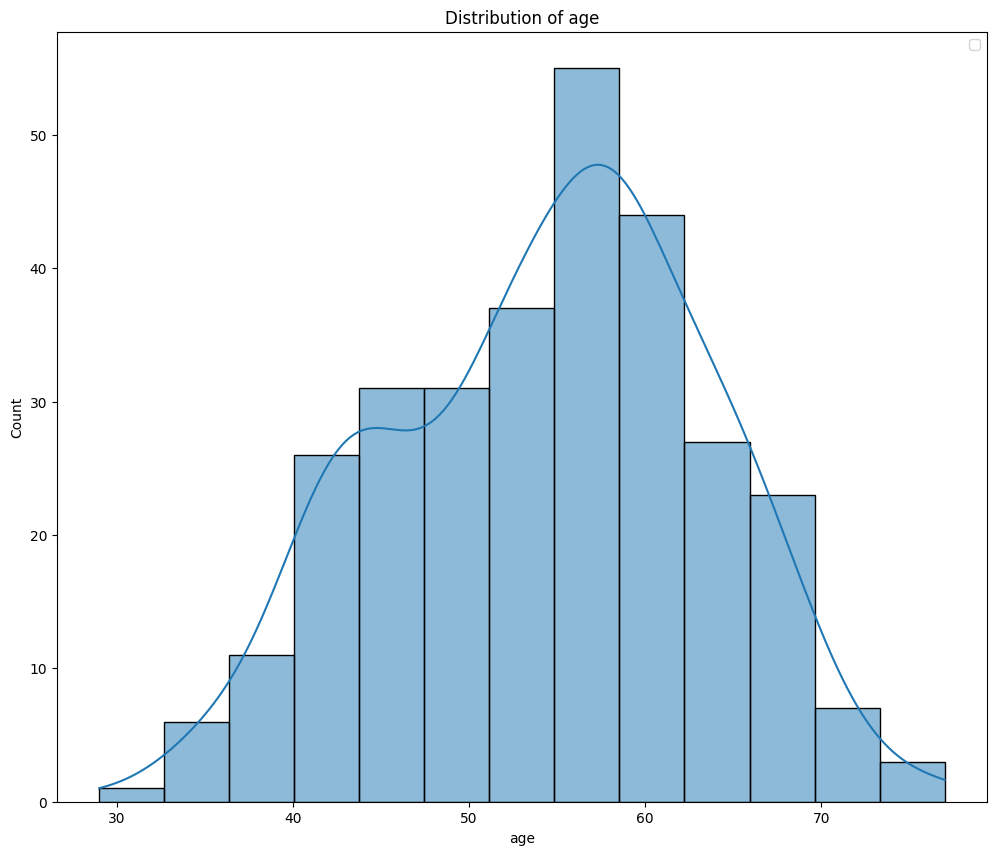

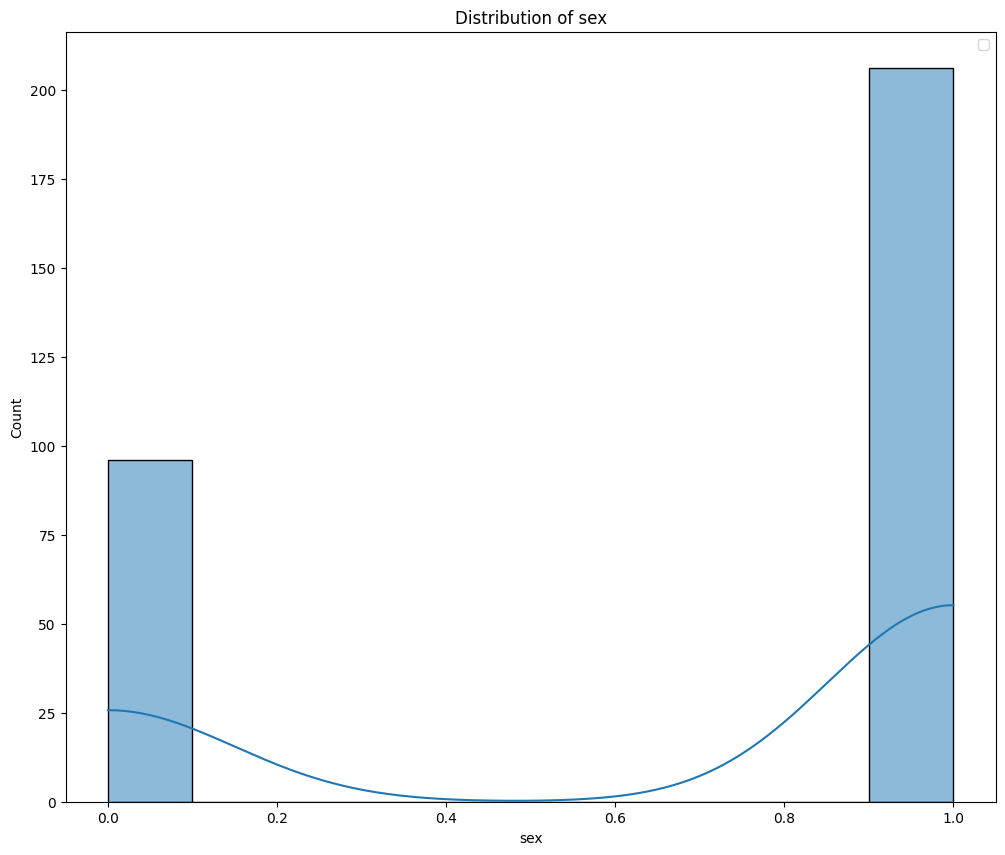

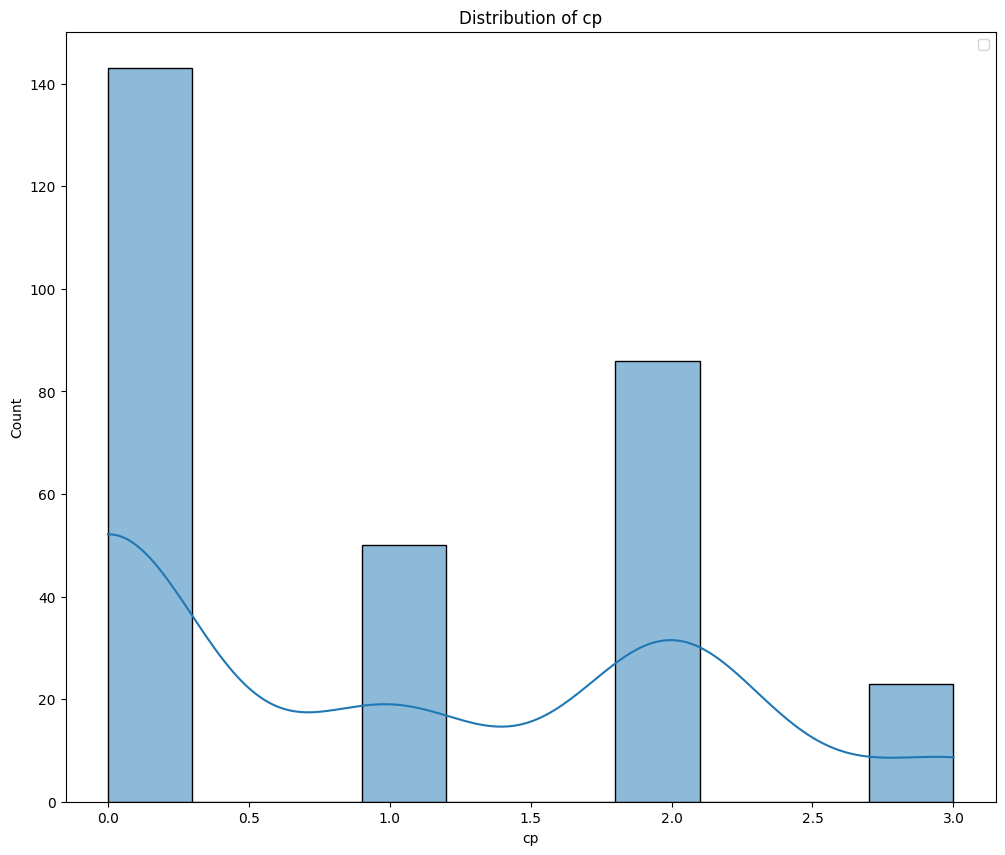

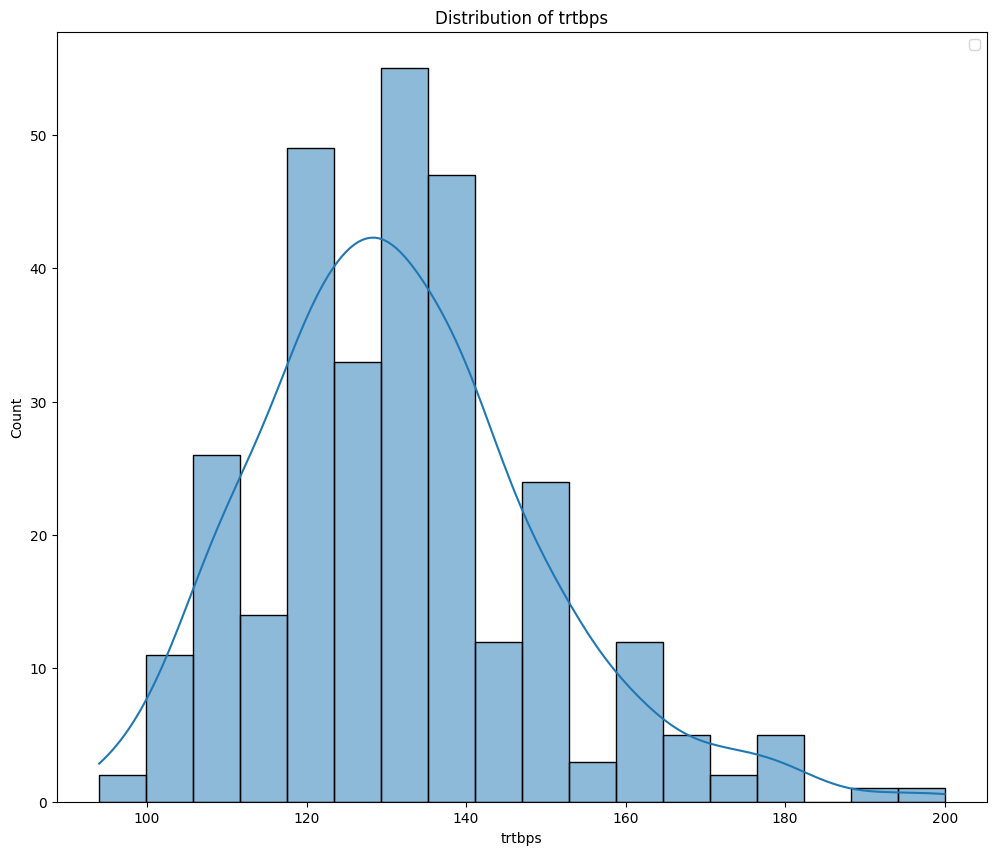

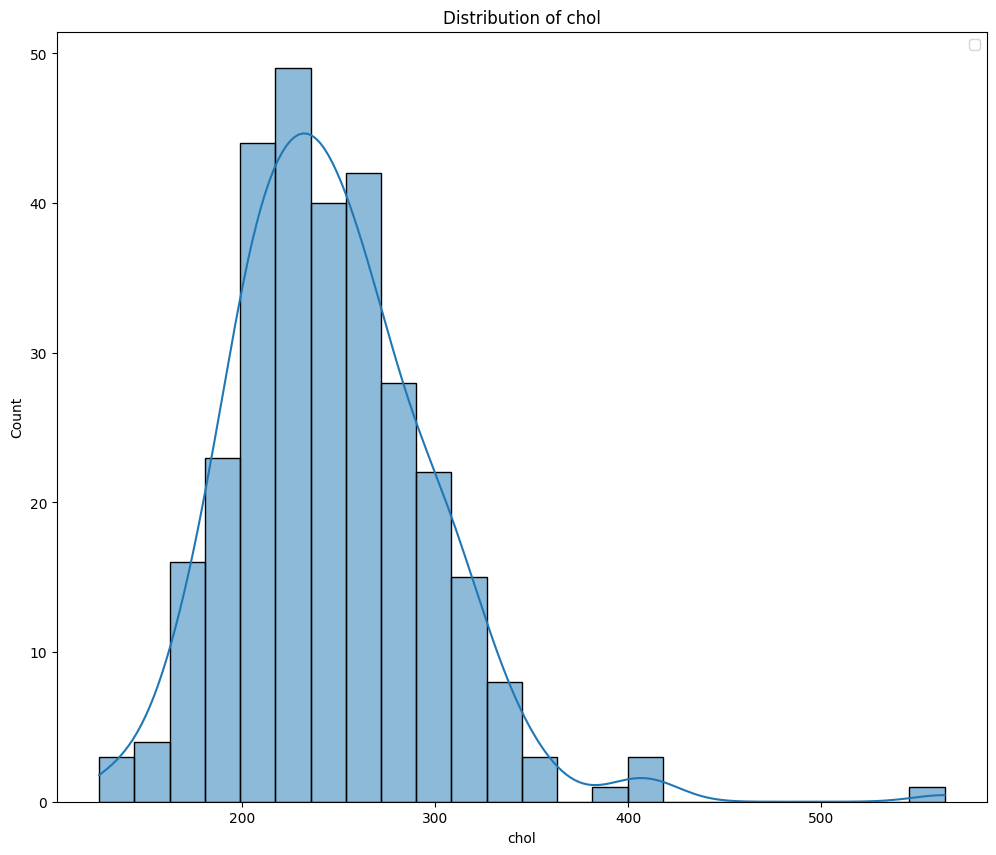

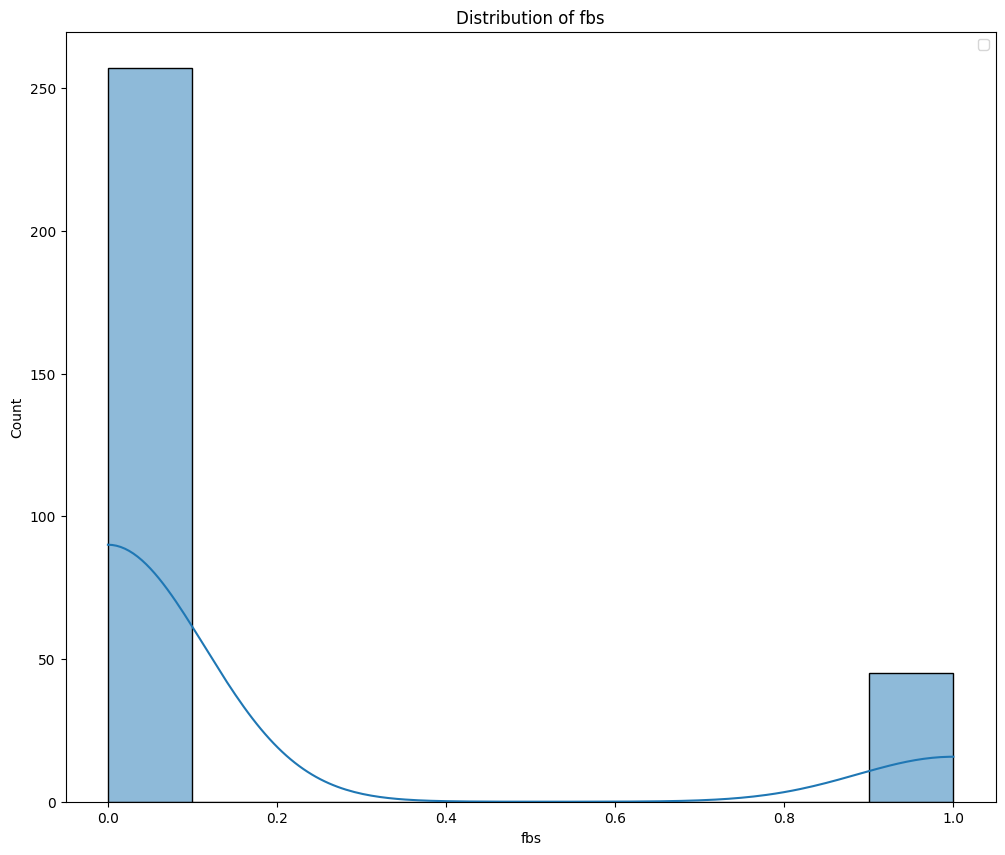

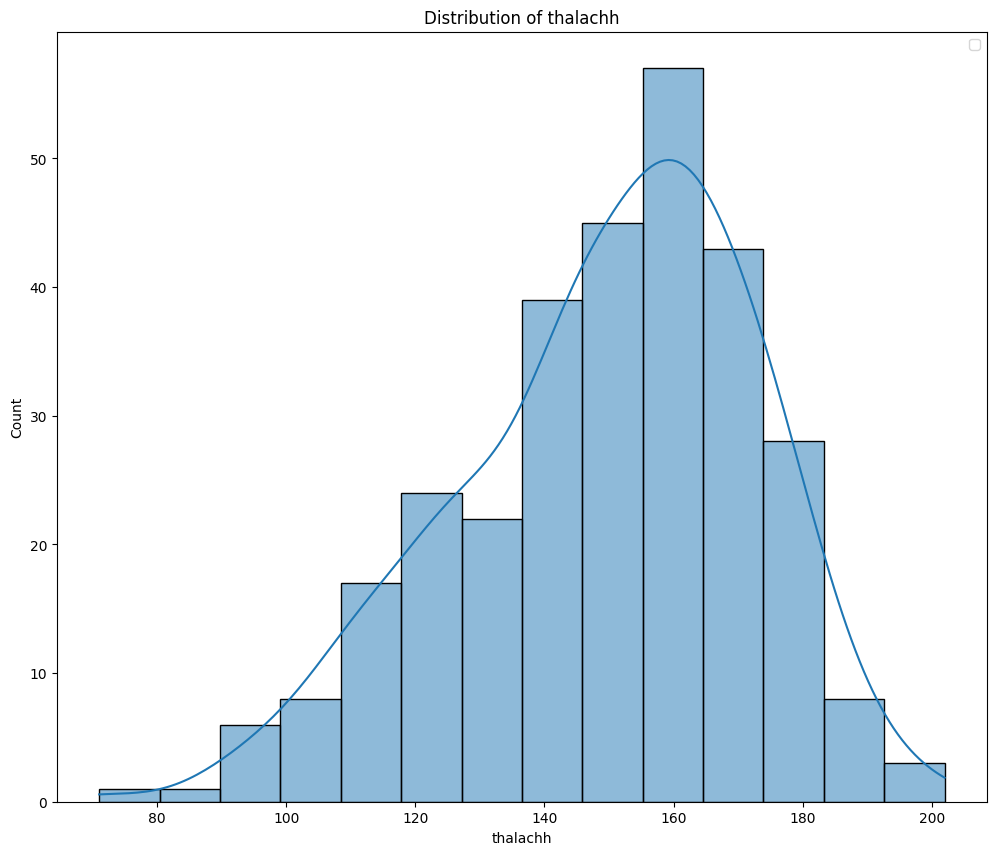

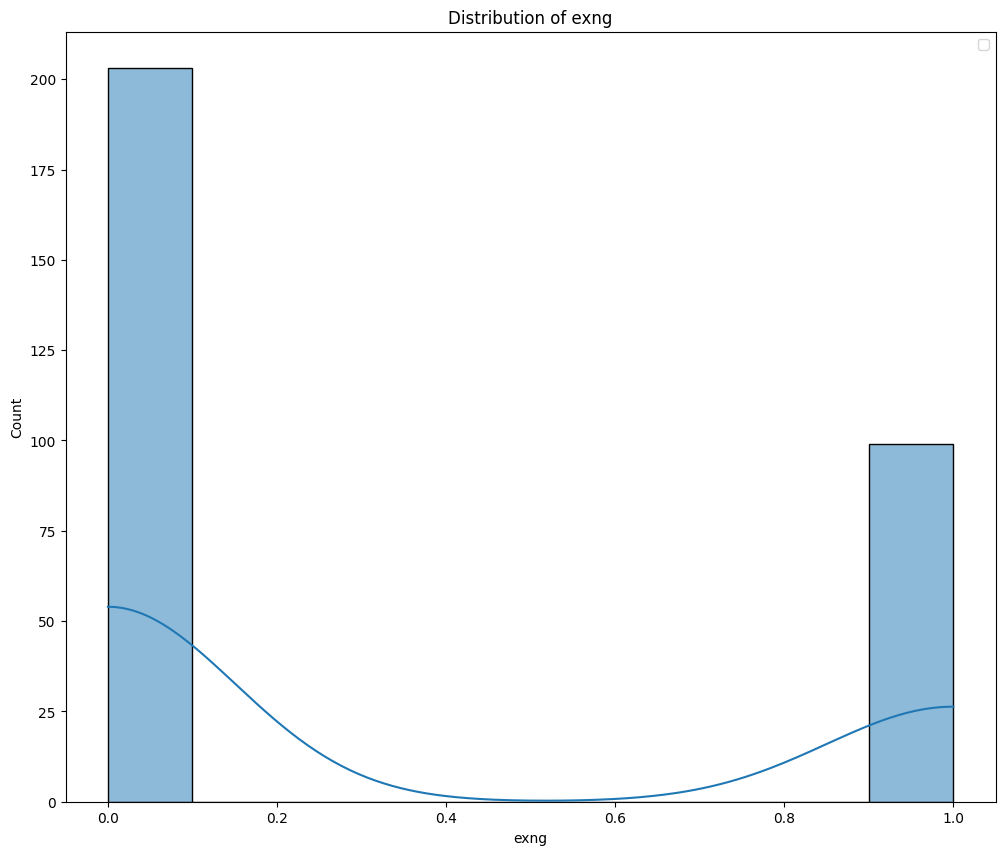

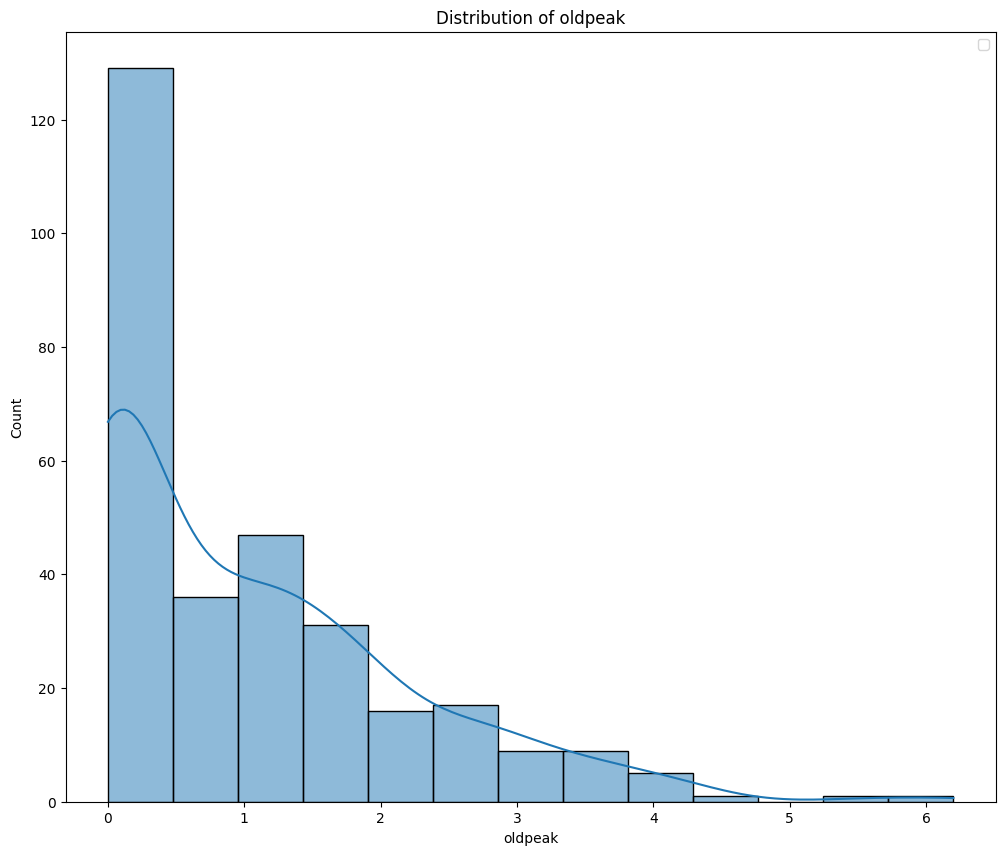

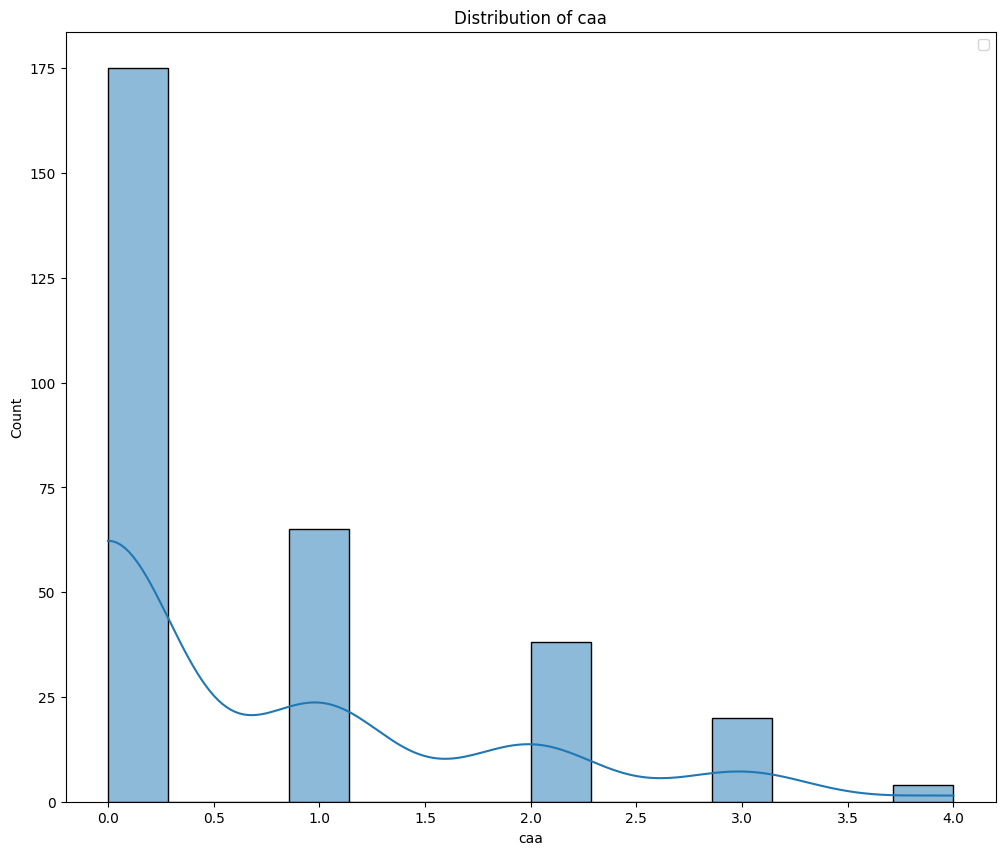

In [11]:
numerical_feature=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak', 'caa']
for feature in numerical_feature:
    plt.figure(figsize=(12,10))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()

 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


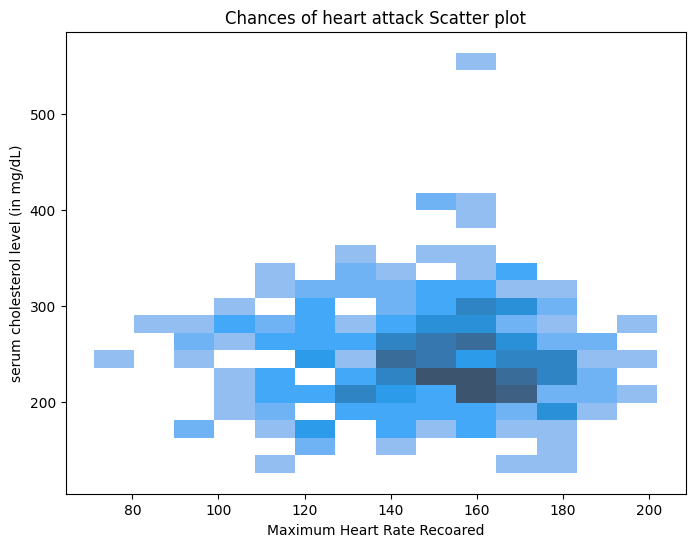

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(x='thalachh', y='chol', data=df, kde=True )
plt.xlabel('Maximum Heart Rate Recoared')
plt.ylabel('serum cholesterol level (in mg/dL)')
plt.title('Chances of heart attack Scatter plot')
plt.show()

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


linear_model
regr= linear_model.LinearRegression()
x= np.asanyarray(train[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak', 'caa']])
y= np.asanyarray(train[['output']])
regr.fit (x, y)

y_hat = regr.predict(test[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak', 'caa']])
x = np.asanyarray(test[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak', 'caa']])
y= np.asanyarray(test[['output']])
print('Coefficients: ', regr.coef_)
print("Residual sum of squares: %2.f"% np.mean((y_hat - y) **2))
print("Variance Score: %.2f" % regr.score(x, y))


Coefficients:  [[-0.00302553 -0.25267559  0.11300225 -0.00262674 -0.00054111  0.07003158
   0.00308131 -0.16960947 -0.09851813 -0.08207864]]
Residual sum of squares:  0
Variance Score: 0.30


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


The model reveals some unexpected insights into heart disease risk. Positive associations suggest that higher chest pain and maximum heart rates during activity are linked to increased risk. Surprisingly, factors like older age, being female, higher resting blood pressure, cholesterol, fasting blood sugar, exercise-induced angina, ST depression during exercise, and more major vessels colored by fluoroscopy are associated with a lower risk of heart disease, contrary to conventional wisdom. While intriguing, these findings challenge our understanding of heart disease risk factors, emphasizing the need for further research to validate and understand these associations.

Other surprising findings include the associations with Higher resting blood pressure, cholesterol levels, and fasting blood sugar levels are all associated with a lower risk of heart disease, which contradicts common knowledge about these factors being risk factors for cardiovascular issues. These findings suggest that the heart might respond differently to stress,offering some protection against heart issues.

The residual sum of squares (RSS) being 0 indicates that the model perfectly fits the training data, explaining all the variability in the data. While this might seem ideal at first glance, a model with an RSS of 0 on the training data can be a cause for concern. It suggests that the model might be overfitting to the training data, capturing the noise or random fluctuations in the data rather than the underlying patterns or relationships that generalize well to new, unseen data.